<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab07_interpolacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Laboratorio metodos computacionales, 
# Interpolacion





# 1. Movimiento de proyectiles en presencia de viento.

Supongamos que un proyectil es lanzado desde el origen con una rapidez $v=vo( \cos \theta , \sin \theta) $. Supongamos además que el efecto del viento sobre el proyectil es el de una fuerza proporcional a la velocidad relativa entre el viento y el proyectil. Teniendo presente que si $u$ es la velocidad del viento y $\alpha$ el ángulo que hace dirección de esta velocidad con el eje x, se puede entrontrar las siguientes ecuaciones diferenciales, asociada al estado de movimiento del [proyectil](https://iopscience.iop.org/article/10.1088/0143-0807/36/2/025016/meta):


\begin{equation}
m\frac{dv_x}{dt} = -mb(v_x-u\cos \alpha )
\end{equation}

\begin{equation}
m\frac{dv_y}{dt} = -mg-mb(v_x-u\sin \alpha ),
\end{equation}

donde b es el párametro de rozamiento. La soluciones a las ecuaciones anteriores vienen dadas por:

Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

Ver imagen:  http://www.sc.ehu.es/sbweb/fisica3/fluidos/viento/parabolico.html


0. Establezca las siguietnes condiciones inciales.

```
#Parametros iniciales

v0 = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = v0/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

Params = (alpha, v0, b, u,g)  #Parametros en tupla.

```



1. Defina dos funciones, una para x y otra para y. 

```

#Posicion en x
def pos_x(t, theta, alpha, v0, b, u,g):
  x = #escriba aca la expresión
  return x

#Posicion en y
def pos_y(t, theta, alpha, v0, b, u,g):


  y = #escriba aca la expresión
  return y 

```

2. Construya un diccionario con las claves "X", "Y", "Tiempo"

3. Con el diccionario construya un data frame de pandas llamado df con los nombres de columnas "X", "Y", "Tiempo"  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.from_dict.html. Defina 1000 registros para el intervalo de tiempo elegido.


4. Realice un gráfico de x como función del tiempo, de y como función del tiempo y la trayectoria de la partícula (df["X"], df["tiempo"], df["Y"]).


5. Determine el alcance máximo de la partícula, para ello tome  la solucion teórica con $y=0$, solucione numéricamente la ecuación para t y remplace este valor en la ecuación para x. Resuelvalo para $\theta=45^{o}$.  

6. Construya una  grafica del alcance máximo R como función de $\theta$, varie $\theta$  entre 10 y 90 grados cada 5 grados.

7. Realice una interpolacion de R como función de theta.











Posición en x
\begin{equation}
x=(u\cos \alpha) t + \frac{1}{b} (v_0\cos \theta_0 -u \cos\alpha)(1-\mathrm{exp}(-bt))
\end{equation}

Posicion en y 
\begin{equation}
y= \frac{1}{b}\left(\frac{g}{b}+v_0 \sin \theta_0 -u\sin\alpha \right)(1-\mathrm{exp}(-bt))-\left( \frac{g}{b}-u\sin\alpha\right)t
\end{equation}

In [1]:
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from scipy.optimize import newton
from scipy.interpolate import lagrange

In [2]:
vo = 60 #Velocidad en m/s
alpha = np.pi #Angulo del viento
theta = np.deg2rad(45) #Angulo de lanzamiento
u = vo/2             #rapidez del viento
b = 0.05             #Parametro de friccion 
g = 9.8                #Aceleracion de la gravedad m/s2

def pos_x(t, vo, theta0, u, alpha, b, g  ):
  t1 = u*np.cos(alpha)*t  
  t2 = 1./b*(vo*np.cos(theta0)-u*np.cos(alpha))  
  t3 = (1-np.exp(-b*t))
  return t1 + t2 * t3


def pos_y(t, vo, theta0, u, alpha, b, g  ):
  t1 = (g/b + vo*np.sin(theta0) - u* np.sin(alpha) )
  t2 = (1-np.exp(-b*t)) 
  t3 = (g/b - u*np.sin(alpha))*t 
  return 1./b * t1 * t2 - t3

In [3]:
t = np.linspace(0, 8.5, 100)
Params = (vo, theta, u, alpha, b , g)  #Parametros en tupla.
x = pos_x(t, *Params)
y = pos_y(t, *Params)

In [4]:
dicc = {"x":x,"y":y ,"t":t}
df = pd.DataFrame(dicc)

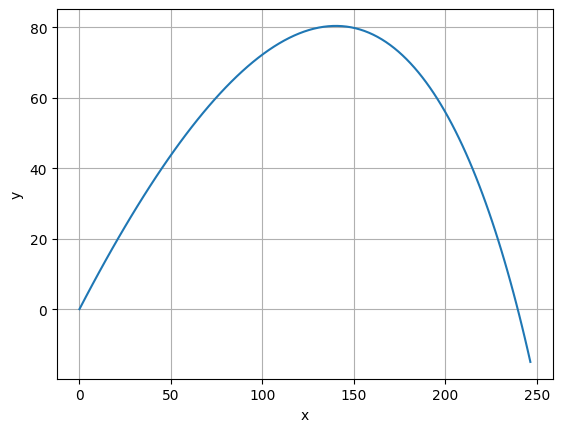

In [5]:
plt.plot(df.x, df.y)
plt.xlabel("x")
plt.ylabel("y")
plt.grid()

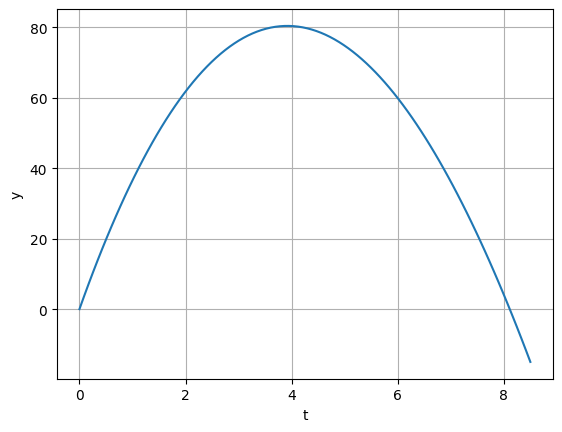

In [6]:
plt.plot(df.t, df.y)
plt.xlabel("t")
plt.ylabel("y")
plt.grid()

In [7]:
tv = newton(pos_y, 6.5, args=Params)
tv

8.111627022095584

In [8]:
pos_x(tv, *Params)

239.60614945520726

# Generalizacion

In [9]:
np.arange(5, 85, 5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [10]:
theta = np.deg2rad(np.arange(5, 80, 5)) #Angulo de lanzamiento
theta

array([0.08726646, 0.17453293, 0.26179939, 0.34906585, 0.43633231,
       0.52359878, 0.61086524, 0.6981317 , 0.78539816, 0.87266463,
       0.95993109, 1.04719755, 1.13446401, 1.22173048, 1.30899694])

In [11]:
Rmax = np.zeros(len(theta))
for i, te in enumerate(theta):
  Params = (vo, te, u, alpha, b , g)  #Parametros en tupla.
  tv = newton(pos_y, 6.5, args = Params)
  Rmax[i] = pos_x(tv, *Params)
  #print(tv,pos_x(tv, *Params))

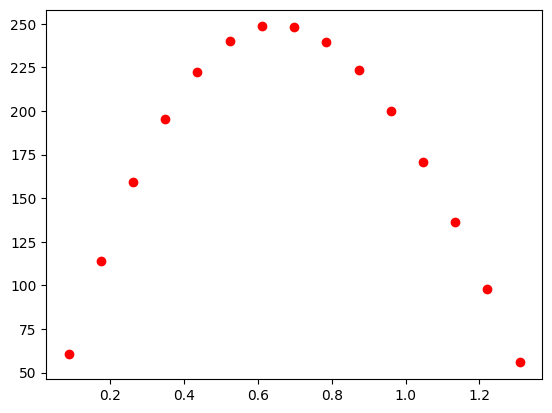

In [12]:
# Alcance maximo como funcion de theta
plt.plot(theta, Rmax,"ro" )

Realice una interpolacion de R como función de theta.

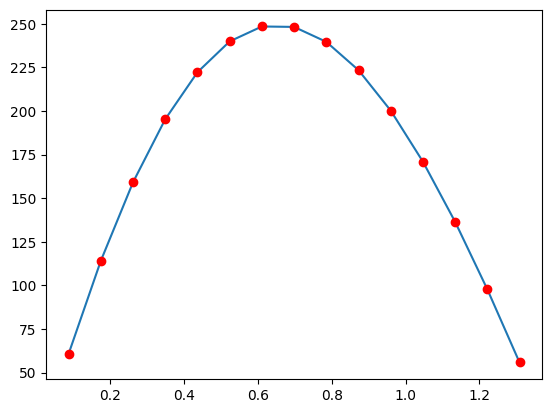

In [13]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(theta,Rmax,bc_type = 'natural')
plt.plot(theta,cs(theta))
plt.plot(theta, Rmax,"ro" );




# 2.0  Interpolación lagrange

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.

 1. Representar gráficamente la función junto al polinomio de interpolación de Lagrange, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 


In [77]:
#Tomemos la función original
def interpolacion (N):
  f_s = lambda x: 1/(1+25*x**2)
  x = np.linspace(-1,1,N)
  y = f_s(x)
  return lagrange(x,y)

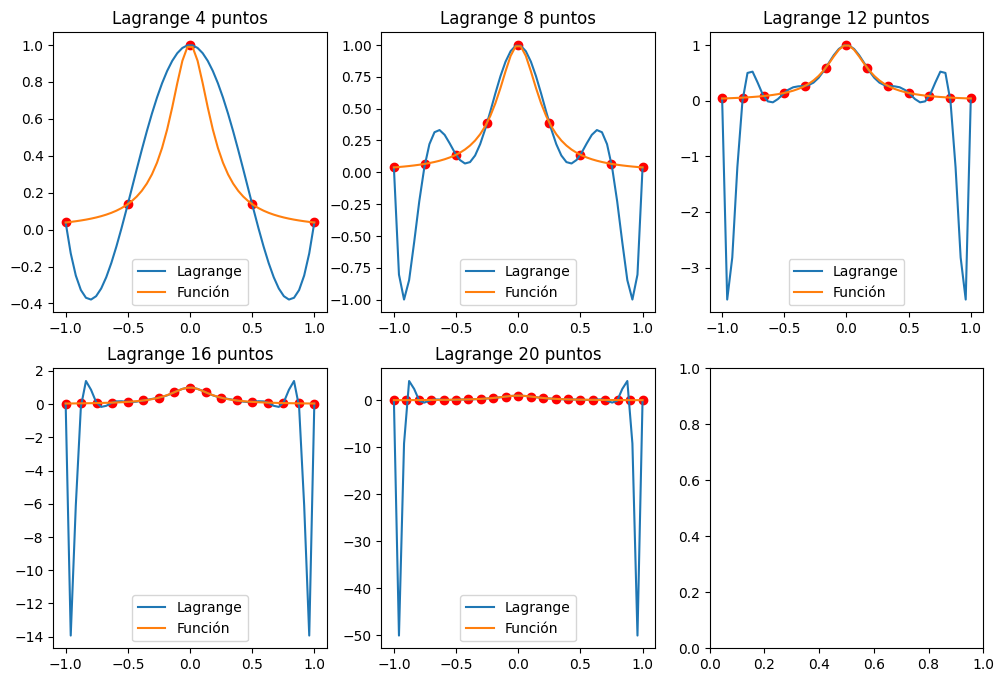

In [78]:
fig,axs = plt.subplots(2,3)
fig.set_size_inches(12,8)
N = [5,9,13,17,21]
f_s = lambda x: 1/(1+25*x**2)
#Para n = 4
axs[0,0].plot(np.linspace(-1,1,N[0]),interpolacion(N[0])(np.linspace(-1,1,N[0])),'ro')
axs[0,0].plot(np.linspace(-1,1,50),interpolacion(N[0])(np.linspace(-1,1,50)),label='Lagrange')
axs[0,0].plot(np.linspace(-1,1,50),f_s(np.linspace(-1,1,50)),label='Función')
axs[0,0].set_title('Lagrange 4 puntos')
axs[0,0].legend();

#Para n = 8
axs[0,1].plot(np.linspace(-1,1,N[1]),interpolacion(N[1])(np.linspace(-1,1,N[1])),'ro')
axs[0,1].plot(np.linspace(-1,1,50),interpolacion(N[1])(np.linspace(-1,1,50)),label='Lagrange')
axs[0,1].plot(np.linspace(-1,1,50),f_s(np.linspace(-1,1,50)),label='Función')
axs[0,1].set_title('Lagrange 8 puntos')
axs[0,1].legend();

#Para n = 12
axs[0,2].plot(np.linspace(-1,1,N[2]),interpolacion(N[2])(np.linspace(-1,1,N[2])),'ro')
axs[0,2].plot(np.linspace(-1,1,50),interpolacion(N[2])(np.linspace(-1,1,50)),label='Lagrange')
axs[0,2].plot(np.linspace(-1,1,50),f_s(np.linspace(-1,1,50)),label='Función')
axs[0,2].set_title('Lagrange 12 puntos')
axs[0,2].legend();

#Para n = 16
axs[1,0].plot(np.linspace(-1,1,N[3]),interpolacion(N[3])(np.linspace(-1,1,N[3])),'ro')
axs[1,0].plot(np.linspace(-1,1,50),interpolacion(N[3])(np.linspace(-1,1,50)),label='Lagrange')
axs[1,0].plot(np.linspace(-1,1,50),f_s(np.linspace(-1,1,50)),label='Función')
axs[1,0].set_title('Lagrange 16 puntos')
axs[1,0].legend();

#Para n = 20
axs[1,1].plot(np.linspace(-1,1,N[4]),interpolacion(N[4])(np.linspace(-1,1,N[4])),'ro')
axs[1,1].plot(np.linspace(-1,1,50),interpolacion(N[4])(np.linspace(-1,1,50)),label='Lagrange')
axs[1,1].plot(np.linspace(-1,1,50),f_s(np.linspace(-1,1,50)),label='Función')
axs[1,1].set_title('Lagrange 20 puntos')
axs[1,1].legend();



 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 
\begin{equation}
f(x) - P(x) = \epsilon = \frac{1}{(n+1)!} f^{(n+1)}(\xi)(x - x_0)(x - x_1) ... (x - x_n)
\end{equation}, emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

In [85]:
#Ayuda: 

import sympy as sp # Cargamos sympy como sp
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import lagrange

f_s = lambda x: 1/(1+25*x**2)
sp.init_printing() # Usar LaTeX para dibujar ecuaciones

x = sp.symbols("x") # x será una variable simbólica
f_s(x)
print(sp.diff(f_s(x),x))
print(sp.diff(f_s(x),x, 1))
print(sp.diff(f_s(x),x, 2))
print(sp.diff(f_s(x),x, 3))
print(sp.diff(f_s(x),x, 4))
print(sp.diff(f_s(x),x, 5))
f5 = sp.diff(f_s(x),x, 5)
fxn5 = sp.lambdify(x,f5,'numpy') #numpy funcion
x_ = np.linspace(-1, 1, 100)

-50*x/(25*x**2 + 1)**2
-50*x/(25*x**2 + 1)**2
50*(100*x**2/(25*x**2 + 1) - 1)/(25*x**2 + 1)**2
15000*x*(-50*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
15000*(10000*x**4/(25*x**2 + 1)**2 - 300*x**2/(25*x**2 + 1) + 1)/(25*x**2 + 1)**3
3750000*x*(-10000*x**4/(25*x**2 + 1)**2 + 400*x**2/(25*x**2 + 1) - 3)/(25*x**2 + 1)**4


280238.95743385755


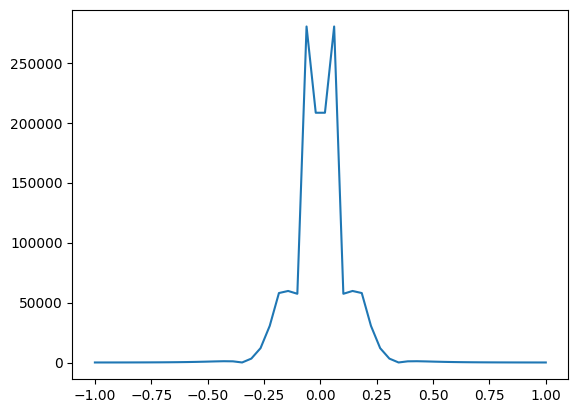

In [86]:
xx = np.linspace(-1,1,50)
plt.plot(xx, abs(fxn5(xx)))
print(np.max(abs(fxn5(xx))))

In [93]:
x_ = np.linspace(-1,1,N[0]) #Puntos de interpolacion

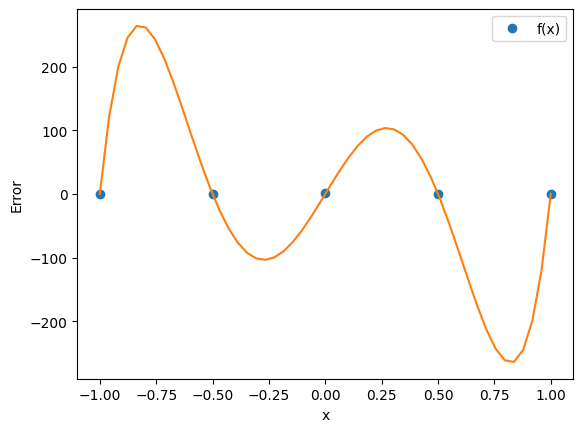

In [94]:
import math as mt
plt.figure()
plt.plot(x_,f_s(x_),"o",label="f(x)")
plt.plot(xx,280238.95743385755*((xx-x_[0])*(xx-x_[1])*(xx-x_[2])*(xx-x_[3])*(xx-x_[4]))/mt.factorial(N[0]))
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.show()


# 3.  Interpolación Hermite

Consideremos la función: 
\begin{equation*}
     f(x) = \frac{1}{1+25x^2}
\end{equation*}
en el intervalo $[-1, 1]$, definamos un conjunto de puntos $n+1$  equiespaciados en $[-1,1]$.





 1. Representar gráficamente la función junto al polinomio de interpolación de Hermite, $p_n(x)$, para $n=\{ 4, 8, 12, 16, 20 \}$. 

In [95]:
from scipy.interpolate import CubicHermiteSpline as hermite
import numpy as np
import matplotlib.pyplot as plt

In [96]:
#Creemos una función para generalizar la interpolación por hermite
def interpolacionHermite(N):
  #Función
  f_s = lambda x: 1/(1+25*x**2)
  #Puntos en X
  x1 = np.linspace(-1,1,N)
  #Puntos en Y
  y = f_s(x1)
  #Derivada
  x = sp.symbols('x')
  derivada1 =sp.diff(f_s(x),x)
  #Convertimos la derivada a numpy
  derivada1n = sp.lambdify(x,derivada1,'numpy')
  derivada1n = derivada1n(x1)
  return hermite(x1,y,derivada1n)

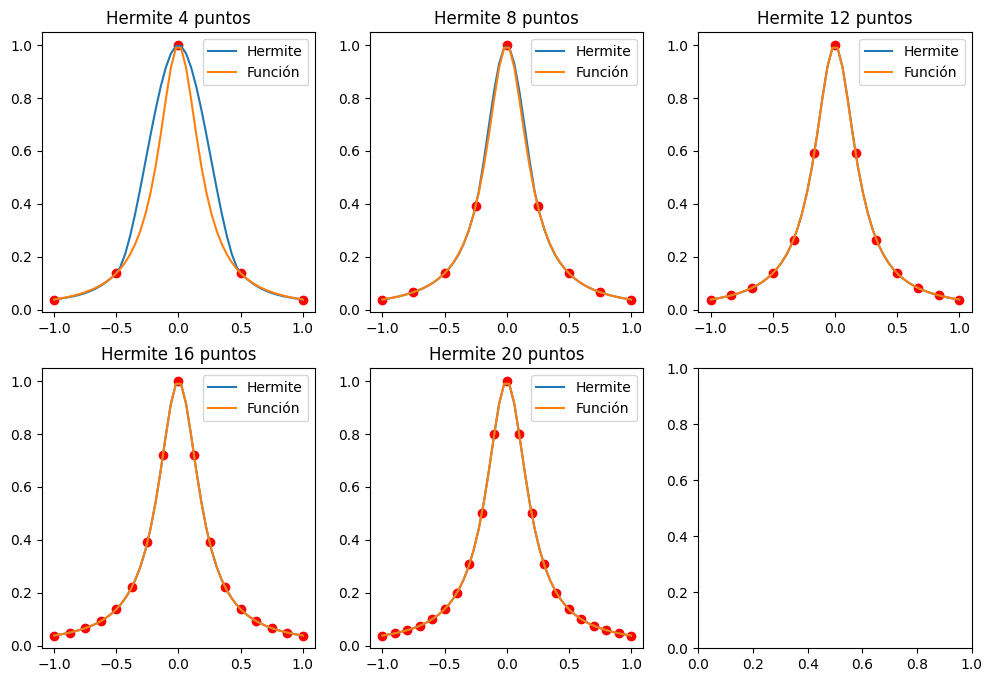

In [97]:
fig,axs = plt.subplots(2,3)
fig.set_size_inches(12,8)
N = [5,9,13,17,21]
f_s = lambda x: 1/(1+25*x**2)
#Para n = 4
axs[0,0].plot(np.linspace(-1,1,N[0]),interpolacionHermite(N[0])(np.linspace(-1,1,N[0])),'ro')
axs[0,0].plot(np.linspace(-1,1,50),interpolacionHermite(N[0])(np.linspace(-1,1,50)),label='Hermite')
axs[0,0].plot(np.linspace(-1,1,50),f_s(np.linspace(-1,1,50)),label='Función')
axs[0,0].set_title('Hermite 4 puntos')
axs[0,0].legend();

#Para n = 8
axs[0,1].plot(np.linspace(-1,1,N[1]),interpolacionHermite(N[1])(np.linspace(-1,1,N[1])),'ro')
axs[0,1].plot(np.linspace(-1,1,50),interpolacionHermite(N[1])(np.linspace(-1,1,50)),label='Hermite')
axs[0,1].plot(np.linspace(-1,1,50),f_s(np.linspace(-1,1,50)),label='Función')
axs[0,1].set_title('Hermite 8 puntos')
axs[0,1].legend();

#Para n = 12
axs[0,2].plot(np.linspace(-1,1,N[2]),interpolacionHermite(N[2])(np.linspace(-1,1,N[2])),'ro')
axs[0,2].plot(np.linspace(-1,1,50),interpolacionHermite(N[2])(np.linspace(-1,1,50)),label='Hermite')
axs[0,2].plot(np.linspace(-1,1,50),f_s(np.linspace(-1,1,50)),label='Función')
axs[0,2].set_title('Hermite 12 puntos')
axs[0,2].legend();

#Para n = 16
axs[1,0].plot(np.linspace(-1,1,N[3]),interpolacionHermite(N[3])(np.linspace(-1,1,N[3])),'ro')
axs[1,0].plot(np.linspace(-1,1,50),interpolacionHermite(N[3])(np.linspace(-1,1,50)),label='Hermite')
axs[1,0].plot(np.linspace(-1,1,50),f_s(np.linspace(-1,1,50)),label='Función')
axs[1,0].set_title('Hermite 16 puntos')
axs[1,0].legend();

#Para n = 20
axs[1,1].plot(np.linspace(-1,1,N[4]),interpolacionHermite(N[4])(np.linspace(-1,1,N[4])),'ro')
axs[1,1].plot(np.linspace(-1,1,50),interpolacionHermite(N[4])(np.linspace(-1,1,50)),label='Hermite')
axs[1,1].plot(np.linspace(-1,1,50),f_s(np.linspace(-1,1,50)),label='Función')
axs[1,1].set_title('Hermite 20 puntos')
axs[1,1].legend();


 2. Comprobar gráficamente cómo el error aumenta con $n$. Emplee la libreria, simbolica de sympy y encuente el error en la interpolación.
 
 Para este numeral, emplee que: 
 
 
La cota del  error , viene dado por: 

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$





emplee la libreria simbolica para realizar la estimación de dicha cuota, sólo para n = 4, en el punto 0.5

8214902.525435231


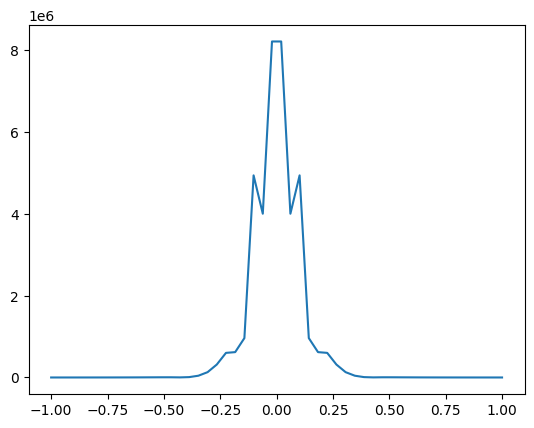

In [99]:
N = [5,9,13,17,21]
f_s = lambda x: 1/(1+25*x**2)
#Puntos en X
x1 = np.linspace(-1,1,N[0])
#Puntos en Y
y = f_s(x1)
#Derivada
x = sp.symbols('x')
derivada1 =sp.diff(f_s(x),x,6)
#Convertimos la derivada a numpy
derivada1n = sp.lambdify(x,derivada1,'numpy')
#Hacemos un dominio para la gráfica
xx = np.linspace(-1,1,50)
plt.plot(xx, abs(derivada1n(xx)))
print(np.max(abs(derivada1n(xx))))

In [113]:
x_ = np.linspace(-1,1,5) #Puntos de interpolacion

$$
  f(x)-p_{2n+1}(x)
  = \frac{f^{2n+2}(\xi)}{(2n+2)!} (x-x_0)^2(x-x_1)^2(x-x_2)^2,
$$

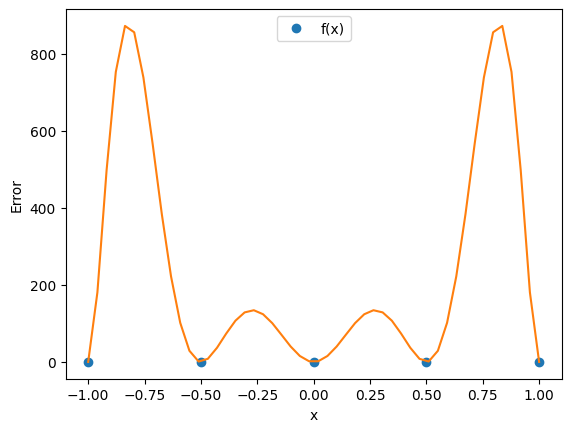

In [114]:
plt.figure()
plt.plot(x_,f_s(x_),"o",label="f(x)")
plt.plot(xx,8214902.525435231*((xx-x_[0])**2*(xx-x_[1])**2*(xx-x_[2])**2*(xx-x_[3])**2*(xx-x_[4])**2)/mt.factorial(N[0]))
plt.xlabel("x")
plt.ylabel("Error")
plt.legend()
plt.show()

# 4. Spline Cúbico

Consideremos la imagen ![paloma](https://github.com/hernansalinas/autogrades/blob/main/Laboratorios_Taller/img/paloma.png?raw=true).



Con los datos dados en la tabla:

Ref: Metodos numericos, Burden.

1. Representar gráficamente la imagen, usando las órdenes `imread` e `imshow` de python (estas órdenes están contenidas en el paquete `matplotlib`) 

In [115]:
#Montemos la imagen desde el drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
import cv2
img = cv2.imread('/content/drive/MyDrive/MetodosComp/Laboratorios/Lab_07/ave.png')

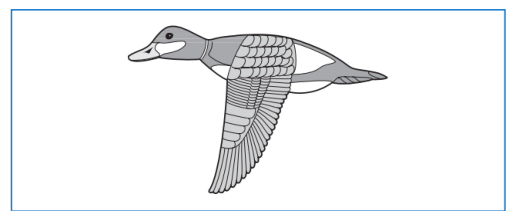

In [117]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

2. Definir una lista de puntos, $x_i$,$y_i$ de la paloma.

In [118]:
x = [0.9,1.3,1.9,2.1,2.6,3.0,3.9,4.4,4.7,5.0,6.0,7.0,8.0,9.2,10.5,11.3,11.6,12.0,12.6,13.0,13.3]
y = [1.3,1.5,1.85,2.1,2.6,2.7,2.4,2.15,2.05,2.1,2.25,2.3,2.25,1.95,1.4,0.9,0.7,0.6,0.5,0.4,0.25]

3. Representar el polinomio de interpolación de Lagrange en estos puntos, para aproximar el dibujo.

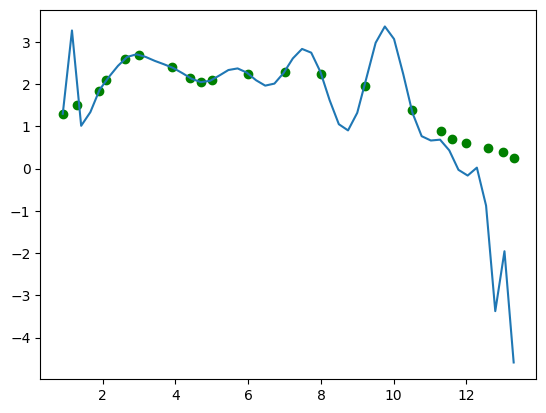

In [119]:
from scipy.interpolate import lagrange
import numpy as np
aveLagrange = lagrange(x,y)
x1 = np.linspace(np.min(x),np.max(x),50)
plt.plot(x,y,'go')
plt.plot(x1,aveLagrange(x1));

Como la función no pasa por todos los puntos vamos a dividir la función por intervalos

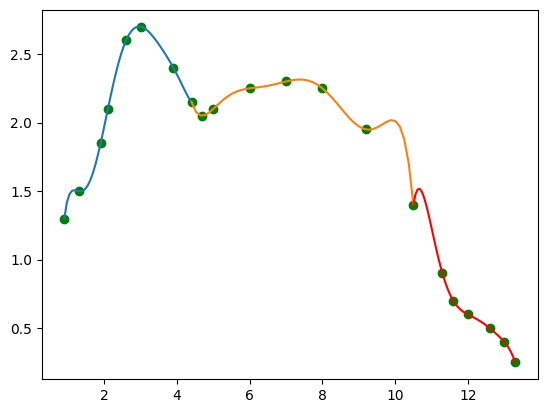

In [120]:
#Debido a la cantidad de puntos, vamos a separarar la función por intervalos
intervalo1x = x[0:8]
intervalo2x = x[7:15]
intervalo3x = x[14:22]
intervalo1y = y[0:8]
intervalo2y = y[7:15]
intervalo3y = y[14:22]

aveLagrange1 = lagrange(intervalo1x,intervalo1y)
aveLagrange2 = lagrange(intervalo2x,intervalo2y)
aveLagrange3 = lagrange(intervalo3x,intervalo3y)
x1 = np.linspace(np.min(intervalo1x),np.max(intervalo1x),50)
x2 = np.linspace(np.min(intervalo2x),np.max(intervalo2x),50)
x3 = np.linspace(np.min(intervalo3x),np.max(intervalo3x),50)
fig, ax = plt.subplots()
ax.plot(x,y,'go')
ax.plot(x1,aveLagrange1(x1));
ax.plot(x2,aveLagrange2(x2));
ax.plot(x3,aveLagrange3(x3),color='red');

4. Repetir el proceso de interpolación mediante *splines* cúbicos. Para ello, utilizar la función `CubicSpline` (contenida en `scipy.interpolate`), 

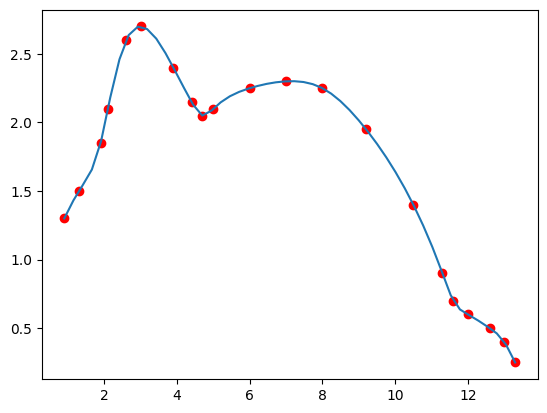

In [121]:
from scipy.interpolate import CubicSpline
cs = CubicSpline(x,y,bc_type = 'natural')
x1 = np.linspace(np.min(x),np.max(x),50)
plt.plot(x,y,'ro')
plt.plot(x1,cs(x1));

5. Comparar los resultados. ¿Alguna de las interpolaciones presenta oscilaciones? ¿A qué se debe este fenómeno?

La interpolación de lagrange resultó no ser tan precisa si hay una cantidad mayor de puntos, a diferencia de la de cubic splines que sí logró tomar una curva que pasara por todos los puntos.
Además, encontramos un error en la versión que usa colab de la librería scipy ya que bajo otra versiones la interpolación de lagrange sí logra pasar por todos los puntos, aunque sigue presentando bastantes oscilaciones.

# 5.0 Ejercicios de Repaso

 En la teoria de campo medio, La magnetización como función de la temperatura de un material magnético  puede ser calculada como:

\begin{equation}
m(T) = \tanh\left( \frac{m(T)}{T} \right)
\end{equation}

donde m y T son la magnetizacion y temperatura reducida respectivamente

Para T = 0.5, determine:



a. La magnetización reducida empleando el metodo de la secante(Muestre su resultado con 4 cifras)

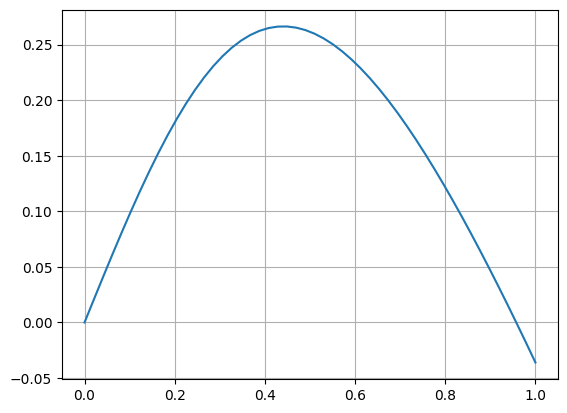

In [64]:
import numpy as np
from scipy import optimize
funcion = lambda m: np.tanh(m/0.5) - m
#Veamos la gráfica de la función para aproximar el cero.
x = np.linspace(0,1,50)
y = funcion(x)
plt.grid()
plt.plot(x,y);
#Tiene varias raíces, vamos a tomar la que está en cero.
raizSecante = optimize.newton(funcion,0)

In [51]:
raizSecante = round(optimize.newton(funcion,1),4)
print(f'La raíz por el método de la secante es {raizSecante}')

La raíz por el método de la secante es 0.9575


b. Valide su respuestado con el metodo de punto fijo.
(Muestre su resultado con 4 cifras)

In [63]:
#Definamos la función para ingresar al método de punto fijo
funcion2 = lambda x: x - funcion(x)
raizPuntoFijo = optimize.fixed_point(funcion2,1)
print(f'La raíz por medio del punto fijo es {raizPuntoFijo}')

La raíz por medio del punto fijo es 0.9575040240772688


c. Defina T = np.linspace(0.1,0.99,100), y emple el metodo de la secante para construir un gráfico de magnetización reducida como función de la temperatura para los  100 valores  de T.


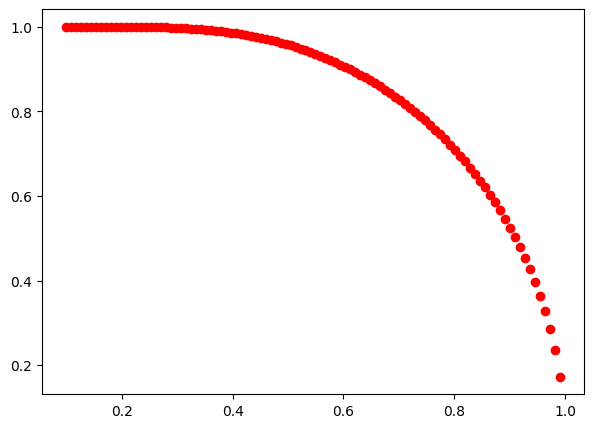

In [39]:
plt.figure(figsize=(7,5))
funcion = lambda m, T: np.tanh(m/T) - m
raices = np.zeros(100)
T1= np.linspace(0.1,0.99,100)
contador = 0
for i in T1:
  raices[contador] = optimize.root_scalar(funcion,args=(i),x0=0.5,x1=0.6).root
  contador +=1
#Grafiquemos
plt.plot(T1,raices,'ro');

d. Para los 100 puntos anteriores, emplee el metodo de interpolación de lagrange y cubic-spline. Realizar una gráfica mostrando los puntos y el polinomio de interpolación para cada unos de los metodos. ¿Que puede concluir de los metodos?

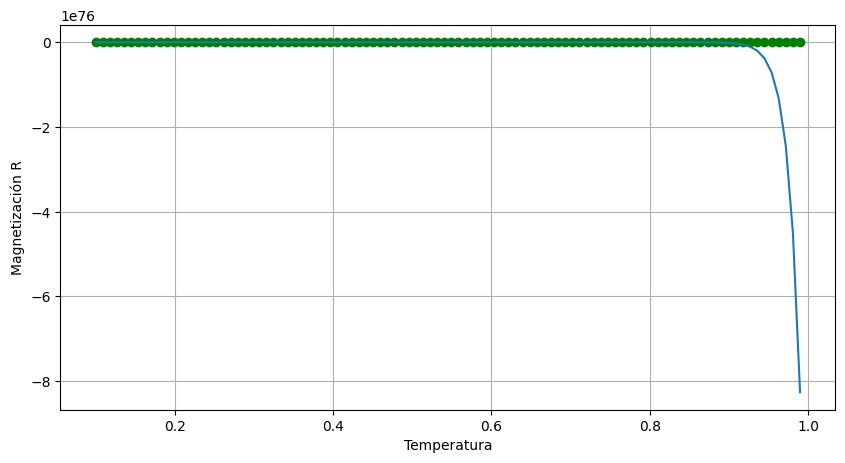

In [48]:
#Mediante Lagrange
plt.figure(figsize=(10,5))
plt.plot(T1,raices,'go')
interpolLagrange = lagrange(T1,raices)
plt.plot(T1,interpolLagrange(T1))
plt.xlabel('Temperatura')
plt.ylabel('Magnetización R')
plt.grid()
plt.show()

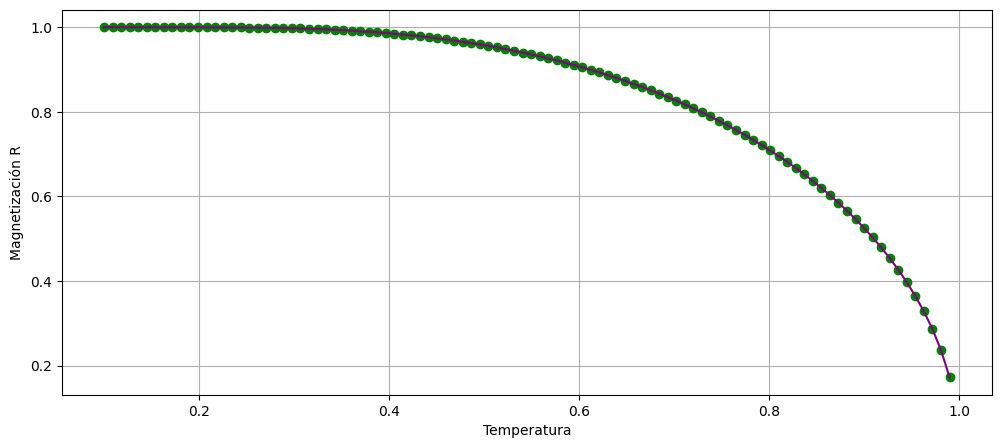

In [46]:
#Mediante splines cubicos
plt.figure(figsize=(12,5))
plt.plot(T1,raices,'go')
interpolcubico = CubicSpline(T1,raices)
plt.plot(T1,interpolcubico(T1), color = 'purple')
plt.xlabel('Temperatura')
plt.ylabel('Magnetización R')
plt.grid()
plt.show()

Se nota drásticamente cómo el método de splines cúbicos es mucho más acertado en la aproximación del polinomio cuando contamos con bastantes puntos.